In [0]:
import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.functions import col
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DateType, TimestampType

from pyspark.sql.functions import explode
from pyspark.sql.functions import posexplode

In [0]:
df_bel_stream_15m_complete = spark.table("default.df_bel_stream_15m_complete")

In [0]:
df_bel_stream_15m_complete.createOrReplaceTempView('df_bel_stream_15m_complete_vw')

In [0]:
result_topstreets = spark.sql("""
SELECT
    street,
    count(*) as reg,
    sum(count) as countn
FROM df_bel_stream_15m_complete_vw
GROUP BY street
ORDER BY countn DESC
LIMIT 100
""")

# Convertir la columna 'street' en una lista
Top_street_list = [row['street'] for row in result_topstreets.collect()]

In [0]:
#df = df_bel_stream_15m_complete # .filter((df_bel_stream_15m_complete['street']== '1593'))

#pdf = df_bel_stream_15m_complete.filter((df_bel_stream_15m_complete['street']== '1593') | (df_bel_stream_15m_complete['street']== '2613') | (df_bel_stream_15m_complete['street']== '1845')).toPandas()

#pdf = df_bel_stream_15m_complete.filter((df_bel_stream_15m_complete['street']== '1593')).toPandas()

#pdf = df_bel_stream_15m_complete.toPandas()

pdf = df_bel_stream_15m_complete.filter(df_bel_stream_15m_complete['street'].isin(Top_street_list)).toPandas()

In [0]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np

pdf_ = pdf

pdf_['count'] = pdf_['count'].replace(0, np.nan)  # Reemplaza ceros por NaN

# Asegurarse de que no hay NaNs
pdf_ = pdf_.dropna()


# Calcular la ACF
acf_values = acf(pdf_['count'], nlags=10)
pacf_values = pacf(pdf_['count'], nlags=10)

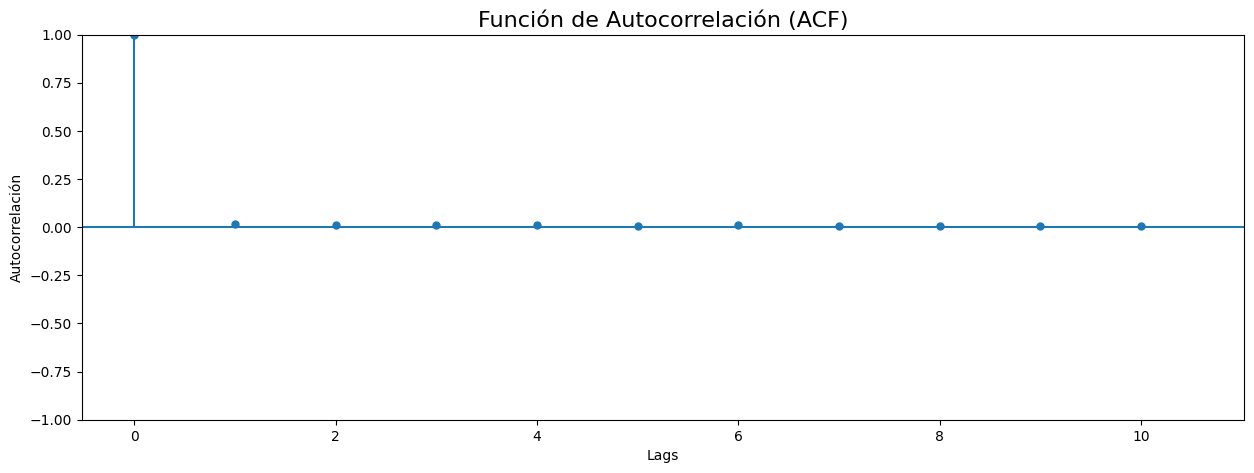

In [0]:
# Generar el correlograma
fig, ax = plt.subplots(figsize=(15, 5))
plot_acf(pdf_['count'], lags=10, ax=ax)

ax.set_title('Función de Autocorrelación (ACF)', fontsize=16)
ax.set_xlabel('Lags', fontsize=10)
ax.set_ylabel('Autocorrelación', fontsize=10)

plt.show()

In [0]:
acf_values

array([1.        , 0.01772472, 0.01401729, 0.01132462, 0.01341595,
       0.00782197, 0.00922546, 0.00749792, 0.00721523, 0.00701667,
       0.00568501])

/databricks/python/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


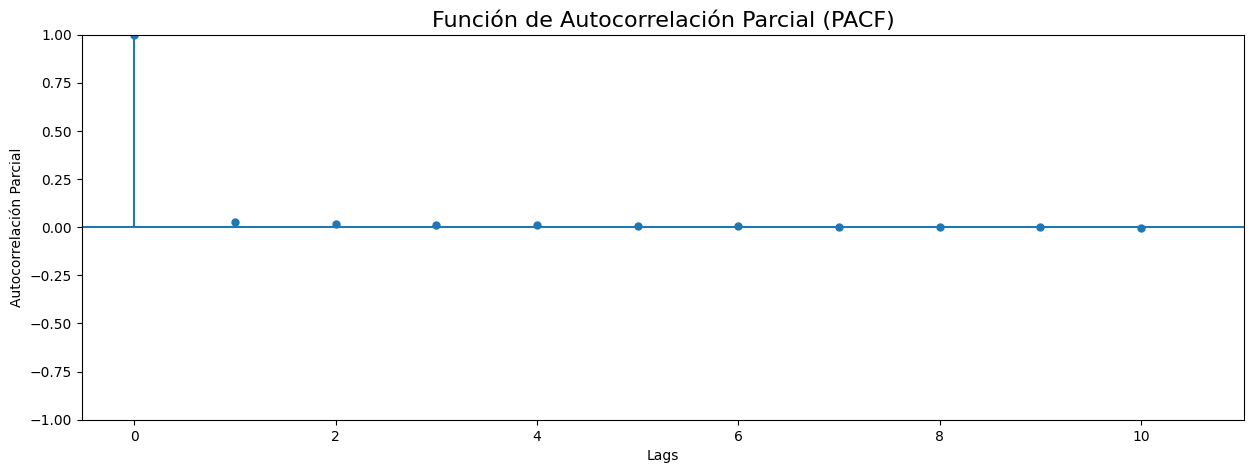

In [0]:

# Generar el correlograma
fig, ax = plt.subplots(figsize=(15, 5))
plot_pacf(pdf['count'], lags=10, ax=ax)

ax.set_title('Función de Autocorrelación Parcial (PACF)', fontsize=16)
ax.set_xlabel('Lags', fontsize=10)
ax.set_ylabel('Autocorrelación Parcial', fontsize=10)

plt.show()

In [0]:
pacf_values

array([ 1.00000000e+00,  3.86936203e-02,  1.02673488e-02,  9.30835230e-04,
        2.59364641e-03,  9.98607122e-03, -9.41786341e-04,  8.83585101e-03,
       -1.38844297e-03, -1.41124569e-03,  7.68519334e-04])

In [0]:
df_decomposed = spark.read.table("default.df_bel_15m_serie1593_decomposed")

In [0]:
pdf_decomposed = df_decomposed.toPandas()